### Part A

Importing Libaries & loading data 

In [13]:
# HERE YOU WILL WRITE CODE TO TEST A NUMBER OF PREDICTORS
# AND FINALLY CHOOSE AND TRAIN THE PREDICTOR THAT YOU WILL BE USING FOR PART B

import pandas as pd
import numpy as np
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, log_loss, recall_score, precision_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler

train_df = pd.read_csv("CE802_P2_Data.csv")
train_df['Class'] = (train_df['Class'] == True).astype(int) # converting bool to int
train_df.head()


,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F13,F14,F15,F16,F17,F18,F19,F20,F21,Class
0,1,164.190,-4178.67,4.99800,-2549.640,13.14900,-2.3611,-5.2077,5335.84,35223.12,...,-4.207,0,0.210430,36.0960,-2114.140,-7.2180,-4488.06,-13.4058,-50.25,0
1,1,198.880,-3543.06,4.30770,-2756.201,14.83800,-4.7280,-5.0266,5798.16,35355.42,...,-3.880,0,0.133771,20.1660,-1666.780,-4.9785,-4640.64,-14.6730,-53.40,1
2,0,181.412,-4216.57,5.05700,-2740.469,9.64290,-2.2035,-5.1951,4049.44,38741.13,...,-3.803,0,0.891100,11.5167,-1786.518,-15.3990,-4306.77,-22.7340,NaN,0
3,0,171.074,-2659.26,4.39720,-2822.720,9.37761,-2.2478,-4.5436,4964.64,35331.99,...,-5.683,0,0.738000,20.4390,-1730.260,-5.3937,-4475.04,-18.0990,-51.66,1
4,0,175.464,-2008.26,3.86574,-2441.840,12.10350,-4.4130,-4.5974,5958.06,34318.53,...,-4.261,1,0.243700,3.8640,-1744.300,-5.3109,-4709.85,-20.8470,-51.63,1


## Checking data Types

In [2]:
train_df.dtypes

F1         int64
F2       float64
F3       float64
F4       float64
F5       float64
F6       float64
F7       float64
F8       float64
F9       float64
F10      float64
F11      float64
F12      float64
F13      float64
F14        int64
F15      float64
F16      float64
F17      float64
F18      float64
F19      float64
F20      float64
F21      float64
Class      int32
dtype: object

## Confusion matrix function

In [2]:
def plot_confusionmatrix(y_train_pred,y_train,dom):
    print(f'{dom} Confusion matrix')
    cf = metrics.confusion_matrix(y_train_pred,y_train)
    sns.heatmap(cf,annot=True,yticklabels=True
               ,xticklabels=True,cmap='Blues', fmt='g')
    plt.tight_layout()
    plt.show()

## Pipeline running method

In [17]:
def runPipeline(classifiers, numeric_transformer, X_train, X_test, y_train, y_test):
    numeric_features = X_train.columns
    preprocessor = ColumnTransformer(
       transformers=[
        ('numeric', numeric_transformer, numeric_features)
    ]) 

    for classifier in classifiers:
        pipe = Pipeline(steps=[('preprocessor',preprocessor),
                          ('classifier', classifier)])
        pipe.fit(X_train, y_train)
        y_pred_train = pipe.predict(X_train)
        y_pred_test = pipe.predict(X_test)
        print(classifier.estimator)
        print(classifier.best_params_)
        print("Train score: %.3f" % pipe.score(X_train, y_train))
        print("Train Recall score %.3f, Precision score: %.3f" % (recall_score(y_train, y_pred_train), precision_score(y_train, y_pred_train)))
        print("Test score: %.3f" % pipe.score(X_test, y_test))
        print("Test Recall score %.3f, Precision score: %.3f" % (recall_score(y_test, y_pred_test), precision_score(y_test, y_pred_test)))

## Preprocessing

In [4]:
filtered_df = train_df.drop('F21', axis=1) # droping column with null value
filtered_df.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F12,F13,F14,F15,F16,F17,F18,F19,F20,Class
0,1,164.190,-4178.67,4.99800,-2549.640,13.14900,-2.3611,-5.2077,5335.84,35223.12,...,9165.460,-4.207,0,0.210430,36.0960,-2114.140,-7.2180,-4488.06,-13.4058,0
1,1,198.880,-3543.06,4.30770,-2756.201,14.83800,-4.7280,-5.0266,5798.16,35355.42,...,10564.260,-3.880,0,0.133771,20.1660,-1666.780,-4.9785,-4640.64,-14.6730,1
2,0,181.412,-4216.57,5.05700,-2740.469,9.64290,-2.2035,-5.1951,4049.44,38741.13,...,8653.606,-3.803,0,0.891100,11.5167,-1786.518,-15.3990,-4306.77,-22.7340,0
3,0,171.074,-2659.26,4.39720,-2822.720,9.37761,-2.2478,-4.5436,4964.64,35331.99,...,9721.860,-5.683,0,0.738000,20.4390,-1730.260,-5.3937,-4475.04,-18.0990,1
4,0,175.464,-2008.26,3.86574,-2441.840,12.10350,-4.4130,-4.5974,5958.06,34318.53,...,8525.340,-4.261,1,0.243700,3.8640,-1744.300,-5.3109,-4709.85,-20.8470,1


In [5]:
X = filtered_df.iloc[:,:-1]
X.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18,F19,F20
0,1,164.190,-4178.67,4.99800,-2549.640,13.14900,-2.3611,-5.2077,5335.84,35223.12,-1.82,9165.460,-4.207,0,0.210430,36.0960,-2114.140,-7.2180,-4488.06,-13.4058
1,1,198.880,-3543.06,4.30770,-2756.201,14.83800,-4.7280,-5.0266,5798.16,35355.42,-3.82,10564.260,-3.880,0,0.133771,20.1660,-1666.780,-4.9785,-4640.64,-14.6730
2,0,181.412,-4216.57,5.05700,-2740.469,9.64290,-2.2035,-5.1951,4049.44,38741.13,-1.82,8653.606,-3.803,0,0.891100,11.5167,-1786.518,-15.3990,-4306.77,-22.7340
3,0,171.074,-2659.26,4.39720,-2822.720,9.37761,-2.2478,-4.5436,4964.64,35331.99,-3.82,9721.860,-5.683,0,0.738000,20.4390,-1730.260,-5.3937,-4475.04,-18.0990
4,0,175.464,-2008.26,3.86574,-2441.840,12.10350,-4.4130,-4.5974,5958.06,34318.53,-1.82,8525.340,-4.261,1,0.243700,3.8640,-1744.300,-5.3109,-4709.85,-20.8470


In [6]:
Y = filtered_df.Class
Y.head()

0    0
1    1
2    0
3    1
4    1
Name: Class, dtype: int64

## Data visulisation

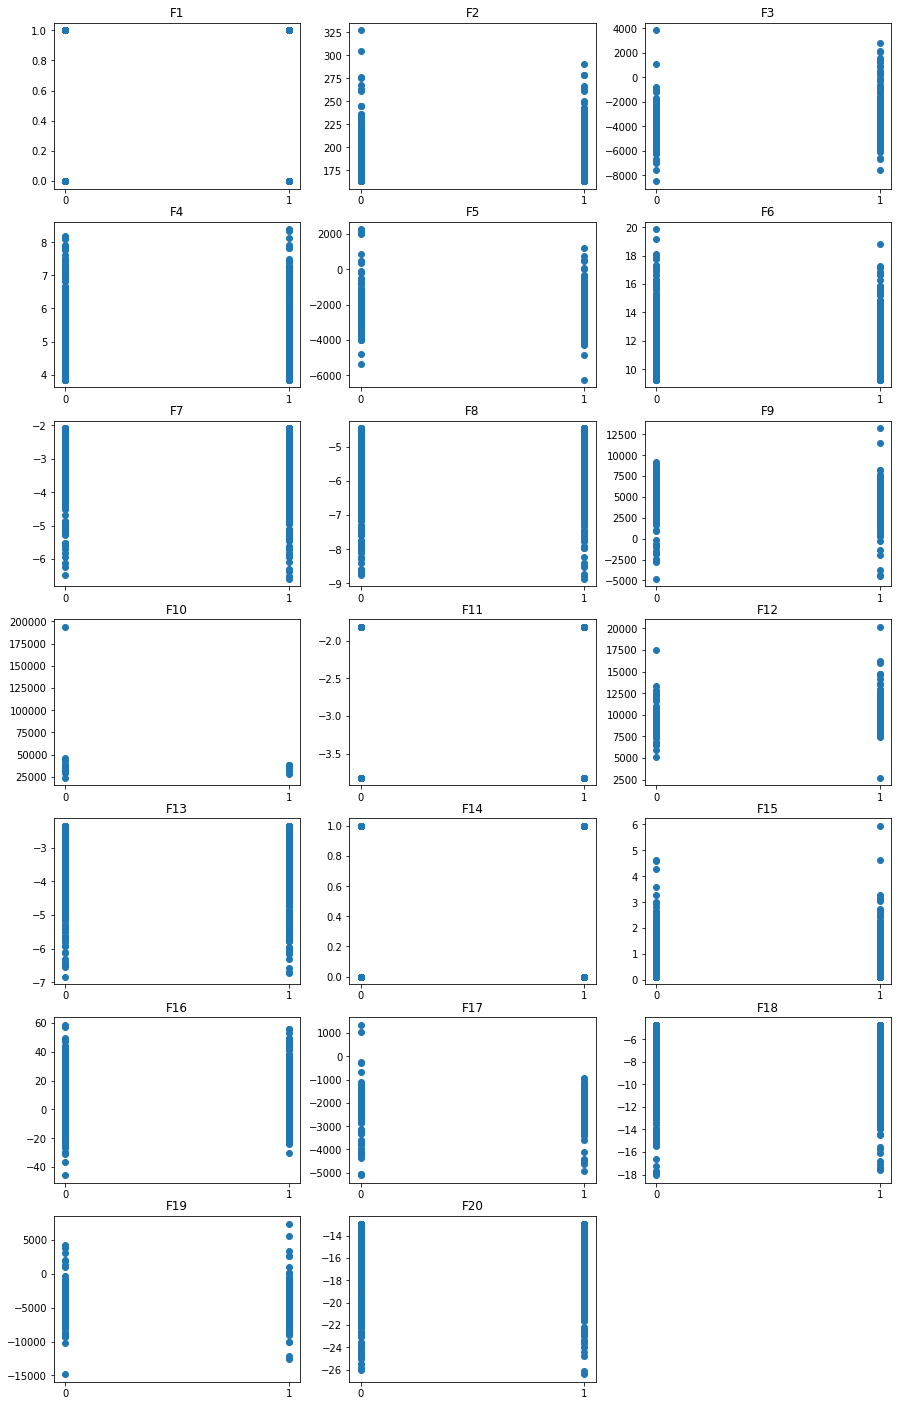

In [7]:
x = X.to_numpy()
y = Y.to_numpy()
plt.figure(figsize=(15,25))
for i in range(x.shape[1]):
    plt.subplot(7, 3, i+1)
    plt.scatter(y,x[:,i])
    plt.xticks([0, 1])
    plt.title(train_df.columns[i])

## Model Selection

In [8]:
classifiers = [
    KNeighborsClassifier(3),
    GaussianNB(),
    BernoulliNB(),
    SVC(kernel="rbf", C=0.025, probability=True),
    NuSVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier()
    ]

df = filtered_df.copy()

X = df.iloc[:,:-1]
Y = df.Class

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

for classifier in classifiers:
    pipe = Pipeline(steps=[
                      ('classifier', classifier)])
    pipe.fit(X_train, y_train)   
    print(classifier)
    print("model score: %.3f" % pipe.score(X_train, y_train))
    print("model score: %.3f" % pipe.score(X_test, y_test))

KNeighborsClassifier(n_neighbors=3)
model score: 0.810
model score: 0.655
GaussianNB()
model score: 0.537
model score: 0.435
BernoulliNB()
model score: 0.521
model score: 0.490
SVC(C=0.025, probability=True)
model score: 0.517
model score: 0.460
NuSVC(probability=True)
model score: 0.564
model score: 0.455
DecisionTreeClassifier()
model score: 1.000
model score: 0.835
RandomForestClassifier()
model score: 1.000
model score: 0.880
AdaBoostClassifier()
model score: 0.835
model score: 0.745
GradientBoostingClassifier()
model score: 0.961
model score: 0.875


## Pipeline for gridSearchCV on all model to find best parameters

In [18]:
params = {'criterion':["entropy","gini"],
          'max_depth': list(range(2,11)),
         'min_samples_split': list(range(2,10)),
         'min_samples_leaf': list(range(1,15))}

clf = DecisionTreeClassifier()
dtCV = GridSearchCV(estimator=clf,param_grid=params, cv=10, n_jobs=-1)

params = {'n_neighbors': list(range(2,120)),
          'weights': ['uniform', 'distance'],
          'algorithm':['auto'],
         'metric': ['minkowski', 'manhattan'],
         'leaf_size':list(range(1,25))}

clf = KNeighborsClassifier()
knnCV = GridSearchCV(estimator=clf,param_grid=params, cv=10, n_jobs=-1)

params = {'solver': ['saga'],
          'penalty': ['l1','l2'],
        'max_iter' : [180, 250, 500, 2000, 5000, 10000, 15000, 20000]}

clf = LogisticRegression()
logisticCV = GridSearchCV(estimator=clf,param_grid=params, cv=10, n_jobs=-1)


params = {'var_smoothing': np.logspace(0,-9, num=100)}

clf = GaussianNB()
nbCV = GridSearchCV(estimator=clf,param_grid=params, cv=10, n_jobs=-1)

clf = GradientBoostingClassifier()
params = {
    "n_estimators":[5,50,250,500],
    "max_depth":[1,3,5,7,9],
    "learning_rate":[0.01,0.1,1,10,100]
}
gbCV = GridSearchCV(estimator=clf,param_grid=params, cv=10, n_jobs=-1)

classifiers = [
    dtCV,
    logisticCV,
    knnCV,
    nbCV,
    gbCV
    ]

## Gridsearch on all models after droping null column

In [19]:
numeric_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler())
])

runPipeline(classifiers, numeric_transformer, X_train, X_test, y_train, y_test)

DecisionTreeClassifier()
{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 4}
Train score: 0.924
Train Recall score 0.925, Precision score: 0.927
Test score: 0.865
Test Recall score 0.870, Precision score: 0.842
LogisticRegression()
{'max_iter': 180, 'penalty': 'l1', 'solver': 'saga'}
Train score: 0.694
Train Recall score 0.645, Precision score: 0.732
Test score: 0.715
Test Recall score 0.652, Precision score: 0.706
KNeighborsClassifier()
{'algorithm': 'auto', 'leaf_size': 1, 'metric': 'manhattan', 'n_neighbors': 37, 'weights': 'distance'}
Train score: 1.000
Train Recall score 1.000, Precision score: 1.000
Test score: 0.675
Test Recall score 0.663, Precision score: 0.642
GaussianNB()
{'var_smoothing': 0.01519911082952933}
Train score: 0.625
Train Recall score 0.659, Precision score: 0.632
Test score: 0.580
Test Recall score 0.576, Precision score: 0.541
GradientBoostingClassifier()
{'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 250}
Train score: 

## Best parameter classifiers of all models

In [20]:
params = {'criterion':["entropy"],
          'max_depth': [5],
         'min_samples_split': [2],
         'min_samples_leaf': [1]}

clf = DecisionTreeClassifier()
dtCV = GridSearchCV(estimator=clf,param_grid=params, cv=10, n_jobs=-1)

params = {'n_neighbors': [37],
          'weights': [ 'distance'],
          'algorithm':['auto'],
          'metric':  ['manhattan'],
          'leaf_size':[1]}

clf = KNeighborsClassifier()
knnCV = GridSearchCV(estimator=clf,param_grid=params, cv=10, n_jobs=-1)

params = {'solver': ['saga'],
          'penalty': ['l1'],
          'max_iter' : [180]}

clf = LogisticRegression()
logisticCV = GridSearchCV(estimator=clf,param_grid=params, cv=10, n_jobs=-1)


params = {'var_smoothing': [0.01519911082952933]}

clf = GaussianNB()
nbCV = GridSearchCV(estimator=clf,param_grid=params, cv=10, n_jobs=-1)

clf = GradientBoostingClassifier()
params = { "n_estimators":[50],
            "max_depth":[5],
            "learning_rate":[0.125]
            }
gbCV = GridSearchCV(estimator=clf,param_grid=params, cv=10, n_jobs=-1)

bestClassifiers = [
                    dtCV,
                    logisticCV,
                    knnCV,
                    nbCV,
                    gbCV
                    ]

In [46]:
df = filtered_df.copy()

X = df.iloc[:,:-1]
Y = df.Class

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

numeric_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler())
])

runPipeline(bestClassifiers, numeric_transformer, X_train, X_test, y_train, y_test)

DecisionTreeClassifier()
{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Train score: 0.922
Train Recall score 0.954, Precision score: 0.902
Test score: 0.900
Test Recall score 0.946, Precision score: 0.853
LogisticRegression()
{'max_iter': 180, 'penalty': 'l1', 'solver': 'saga'}
Train score: 0.694
Train Recall score 0.645, Precision score: 0.732
Test score: 0.715
Test Recall score 0.652, Precision score: 0.706
KNeighborsClassifier()
{'algorithm': 'auto', 'leaf_size': 1, 'metric': 'manhattan', 'n_neighbors': 37, 'weights': 'distance'}
Train score: 1.000
Train Recall score 1.000, Precision score: 1.000
Test score: 0.675
Test Recall score 0.663, Precision score: 0.642
GaussianNB()
{'var_smoothing': 0.01519911082952933}
Train score: 0.625
Train Recall score 0.659, Precision score: 0.632
Test score: 0.580
Test Recall score 0.576, Precision score: 0.541
GradientBoostingClassifier()
{'learning_rate': 0.125, 'max_depth': 5, 'n_estimators': 50}
Train sco

## Using MICE Imputer on best hyper parameters classifiers

In [22]:
# Imputing with MICE
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn import linear_model

df_mice = train_df.copy()

X = df_mice.iloc[:,:-1]
Y = df_mice.Class

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

numeric_features = X_train.columns
numeric_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler()),
    ('imputer',IterativeImputer(estimator=linear_model.BayesianRidge(), n_nearest_features=None, imputation_order='ascending')
)
])

runPipeline(bestClassifiers, numeric_transformer, X_train, X_test, y_train, y_test)

DecisionTreeClassifier()
{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Train score: 0.919
Train Recall score 0.961, Precision score: 0.890
Test score: 0.890
Test Recall score 0.946, Precision score: 0.837
LogisticRegression()
{'max_iter': 180, 'penalty': 'l1', 'solver': 'saga'}
Train score: 0.731
Train Recall score 0.710, Precision score: 0.756
Test score: 0.750
Test Recall score 0.783, Precision score: 0.706
KNeighborsClassifier()
{'algorithm': 'auto', 'leaf_size': 1, 'metric': 'manhattan', 'n_neighbors': 37, 'weights': 'distance'}
Train score: 1.000
Train Recall score 1.000, Precision score: 1.000
Test score: 0.675
Test Recall score 0.696, Precision score: 0.634
GaussianNB()
{'var_smoothing': 0.01519911082952933}
Train score: 0.679
Train Recall score 0.691, Precision score: 0.689
Test score: 0.635
Test Recall score 0.663, Precision score: 0.592
GradientBoostingClassifier()
{'learning_rate': 0.125, 'max_depth': 5, 'n_estimators': 50}
Train sco

## Finding KNN Imputers best parameters

In [24]:
# Imputing with KNN
from sklearn.impute import KNNImputer

df_knn = train_df.copy()

X = df_knn.iloc[:,:-1]
Y = df_knn.Class

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

numeric_features = X_train.columns
preprocessors = []

for n in range(2,10):
    numeric_transformer = Pipeline(steps=[
        ('scaler', MinMaxScaler()),
        ('imputer',KNNImputer(n_neighbors=n, weights='uniform', metric='nan_euclidean'))
    ])

    preprocessor = ColumnTransformer(
       transformers=[
        ('numeric', numeric_transformer, numeric_features)
    ])
    preprocessors.append(preprocessor)
    classifier = classifiers[0]
    pipe = Pipeline(steps=[('preprocessor',preprocessor),
                      ('classifier', classifier)])
    pipe.fit(X_train, y_train)   
    print(n)
    print(classifier.best_params_)
    print("Train score: %.3f" % pipe.score(X_train, y_train))
    print("Test score: %.3f" % pipe.score(X_test, y_test))

2
{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 6, 'min_samples_split': 8}
Train score: 0.916
Test score: 0.900
3
{'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 8, 'min_samples_split': 4}
Train score: 0.925
Test score: 0.880
4
{'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 8, 'min_samples_split': 3}
Train score: 0.924
Test score: 0.890
5
{'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 8, 'min_samples_split': 9}
Train score: 0.924
Test score: 0.895
6
{'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 8, 'min_samples_split': 2}
Train score: 0.926
Test score: 0.895
7
{'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 12, 'min_samples_split': 5}
Train score: 0.900
Test score: 0.900
8
{'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 8, 'min_samples_split': 2}
Train score: 0.922
Test score: 0.890
9
{'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 8, 'min_samples_split': 8}
Train score: 0.921
Test

## Using KNN Imputer on best hyper parameters classifiers

In [45]:
from sklearn.impute import KNNImputer

df_knn = train_df.copy()

X = df_knn.iloc[:,:-1]
Y = df_knn.Class

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

numeric_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler()),
    ('imputer',KNNImputer(n_neighbors=2, weights='uniform', metric='nan_euclidean'))
])
runPipeline(bestClassifiers, numeric_transformer, X_train, X_test, y_train, y_test)

DecisionTreeClassifier()
{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Train score: 0.922
Train Recall score 0.954, Precision score: 0.902
Test score: 0.900
Test Recall score 0.946, Precision score: 0.853
LogisticRegression()
{'max_iter': 180, 'penalty': 'l1', 'solver': 'saga'}
Train score: 0.708
Train Recall score 0.708, Precision score: 0.722
Test score: 0.740
Test Recall score 0.793, Precision score: 0.689
KNeighborsClassifier()
{'algorithm': 'auto', 'leaf_size': 1, 'metric': 'manhattan', 'n_neighbors': 37, 'weights': 'distance'}
Train score: 1.000
Train Recall score 1.000, Precision score: 1.000
Test score: 0.665
Test Recall score 0.685, Precision score: 0.624
GaussianNB()
{'var_smoothing': 0.01519911082952933}
Train score: 0.657
Train Recall score 0.705, Precision score: 0.658
Test score: 0.635
Test Recall score 0.696, Precision score: 0.587
GradientBoostingClassifier()
{'learning_rate': 0.125, 'max_depth': 5, 'n_estimators': 50}
Train sco

## Using Mean Imputer on best hyper parameters classifiers

In [30]:
from sklearn.impute import SimpleImputer

df_mean = train_df.copy()

X = df_mean.iloc[:,:-1]
Y = df_mean.Class

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

numeric_features = X_train.columns
numeric_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler()),
    ('imputer',SimpleImputer(strategy='mean'))
])

runPipeline(bestClassifiers, numeric_transformer, X_train, X_test, y_train, y_test)

DecisionTreeClassifier()
{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Train score: 0.925
Train Recall score 0.957, Precision score: 0.904
Test score: 0.885
Test Recall score 0.935, Precision score: 0.835
LogisticRegression()
{'max_iter': 180, 'penalty': 'l1', 'solver': 'saga'}
Train score: 0.738
Train Recall score 0.722, Precision score: 0.759
Test score: 0.770
Test Recall score 0.815, Precision score: 0.721
KNeighborsClassifier()
{'algorithm': 'auto', 'leaf_size': 1, 'metric': 'manhattan', 'n_neighbors': 37, 'weights': 'distance'}
Train score: 1.000
Train Recall score 1.000, Precision score: 1.000
Test score: 0.665
Test Recall score 0.674, Precision score: 0.626
GaussianNB()
{'var_smoothing': 0.01519911082952933}
Train score: 0.682
Train Recall score 0.708, Precision score: 0.688
Test score: 0.640
Test Recall score 0.674, Precision score: 0.596
GradientBoostingClassifier()
{'learning_rate': 0.125, 'max_depth': 5, 'n_estimators': 50}
Train sco

## Using Median Imputer on best hyper parameters classifiers

In [31]:
df_mean = train_df.copy()

X = df_mean.iloc[:,:-1]
Y = df_mean.Class

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

numeric_features = X_train.columns
numeric_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler()),
    ('imputer',SimpleImputer(strategy='median'))
])

runPipeline(bestClassifiers, numeric_transformer, X_train, X_test, y_train, y_test)

DecisionTreeClassifier()
{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Train score: 0.925
Train Recall score 0.957, Precision score: 0.904
Test score: 0.885
Test Recall score 0.935, Precision score: 0.835
LogisticRegression()
{'max_iter': 180, 'penalty': 'l1', 'solver': 'saga'}
Train score: 0.733
Train Recall score 0.710, Precision score: 0.758
Test score: 0.760
Test Recall score 0.783, Precision score: 0.720
KNeighborsClassifier()
{'algorithm': 'auto', 'leaf_size': 1, 'metric': 'manhattan', 'n_neighbors': 37, 'weights': 'distance'}
Train score: 1.000
Train Recall score 1.000, Precision score: 1.000
Test score: 0.675
Test Recall score 0.685, Precision score: 0.636
GaussianNB()
{'var_smoothing': 0.01519911082952933}
Train score: 0.680
Train Recall score 0.691, Precision score: 0.691
Test score: 0.640
Test Recall score 0.663, Precision score: 0.598
GradientBoostingClassifier()
{'learning_rate': 0.125, 'max_depth': 5, 'n_estimators': 50}
Train sco

## Dropping rows with missing values

In [32]:
dropped_df = train_df.dropna()
print(dropped_df.shape)

(500, 22)


## Using best hyper parameters classifiers after dropping rows with missing values

In [33]:
X = dropped_df.iloc[:,:-1]
Y = dropped_df.Class

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

numeric_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler())
])
runPipeline(bestClassifiers, numeric_transformer, X_train, X_test, y_train, y_test)

DecisionTreeClassifier()
{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Train score: 0.945
Train Recall score 0.957, Precision score: 0.939
Test score: 0.800
Test Recall score 0.837, Precision score: 0.735
LogisticRegression()
{'max_iter': 180, 'penalty': 'l1', 'solver': 'saga'}
Train score: 0.785
Train Recall score 0.798, Precision score: 0.790
Test score: 0.800
Test Recall score 0.814, Precision score: 0.745
KNeighborsClassifier()
{'algorithm': 'auto', 'leaf_size': 1, 'metric': 'manhattan', 'n_neighbors': 37, 'weights': 'distance'}
Train score: 1.000
Train Recall score 1.000, Precision score: 1.000
Test score: 0.760
Test Recall score 0.767, Precision score: 0.702
GaussianNB()
{'var_smoothing': 0.01519911082952933}
Train score: 0.790
Train Recall score 0.779, Precision score: 0.810
Test score: 0.740
Test Recall score 0.767, Precision score: 0.673
GradientBoostingClassifier()
{'learning_rate': 0.125, 'max_depth': 5, 'n_estimators': 50}
Train sco

In [34]:
print(train_df.shape)
train_df.isnull().sum()

(1000, 22)


F1         0
F2         0
F3         0
F4         0
F5         0
F6         0
F7         0
F8         0
F9         0
F10        0
F11        0
F12        0
F13        0
F14        0
F15        0
F16        0
F17        0
F18        0
F19        0
F20        0
F21      500
Class      0
dtype: int64

In [35]:
train_df.isnull().mean()

F1       0.0
F2       0.0
F3       0.0
F4       0.0
F5       0.0
F6       0.0
F7       0.0
F8       0.0
F9       0.0
F10      0.0
F11      0.0
F12      0.0
F13      0.0
F14      0.0
F15      0.0
F16      0.0
F17      0.0
F18      0.0
F19      0.0
F20      0.0
F21      0.5
Class    0.0
dtype: float64

## Visualising KNNImputed data

In [36]:

# Imputing with KNNImputer

from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler

#Define a subset of the dataset
df_knn = train_df.copy()

# Define scaler to set values between 0 and 1

scaler = MinMaxScaler(feature_range=(0, 1))
df_knn = pd.DataFrame(scaler.fit_transform(df_knn), columns = df_knn.columns)

# Define KNN imputer and fill missing values
knn_imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
df_knn_imputed = pd.DataFrame(knn_imputer.fit_transform(df_knn), columns=df_knn.columns)

In [37]:
df_knn_imputed.isnull().mean()

F1       0.0
F2       0.0
F3       0.0
F4       0.0
F5       0.0
F6       0.0
F7       0.0
F8       0.0
F9       0.0
F10      0.0
F11      0.0
F12      0.0
F13      0.0
F14      0.0
F15      0.0
F16      0.0
F17      0.0
F18      0.0
F19      0.0
F20      0.0
F21      0.0
Class    0.0
dtype: float64

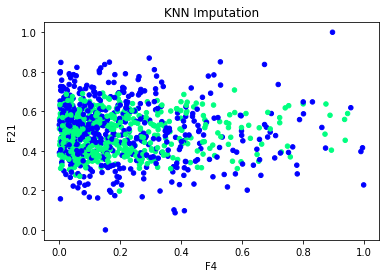

In [38]:
fig = plt.Figure()
null_values = train_df['F21'].isnull() 
fig = df_knn_imputed.plot(x='F4', y='F21', kind='scatter', c=null_values, cmap='winter', title='KNN Imputation', colorbar=False)

## Visualising MICE Imputed data

In [39]:
# Imputing with MICE
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn import linear_model

df_mice = train_df.copy()

# Define MICE Imputer and fill missing values
mice_imputer = IterativeImputer(estimator=linear_model.BayesianRidge(), n_nearest_features=None, imputation_order='ascending')

df_mice_imputed = pd.DataFrame(mice_imputer.fit_transform(df_mice), columns=df_mice.columns)

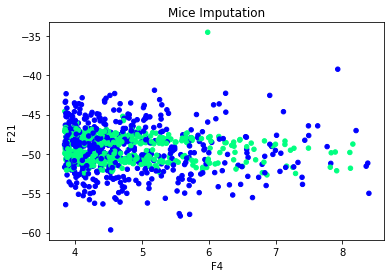

In [40]:
fig = plt.Figure()
null_values = train_df['F21'].isnull() 
fig = df_mice_imputed.plot(x='F4', y='F21', kind='scatter', c=null_values, cmap='winter', title='Mice Imputation', colorbar=False)

## Gradient Boosting classifier with Best Accuracy

In [65]:
df = filtered_df.copy()

X = df.iloc[:,:-1]
Y = df.Class

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

numeric_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler())
])

numeric_features = X_train.columns
preprocessor = ColumnTransformer(
   transformers=[
    ('numeric', numeric_transformer, numeric_features)
]) 

clf = GradientBoostingClassifier()
params = { "n_estimators":[50],
            "max_depth":[5],
            "learning_rate":[0.125]
            }
classifier = GridSearchCV(estimator=clf,param_grid=params, cv=10, n_jobs=-1)

pipe = Pipeline(steps=[('preprocessor',preprocessor),
                          ('classifier', classifier)])

pipe.fit(X_train, y_train)
y_pred_train = pipe.predict(X_train)
y_pred_test = pipe.predict(X_test)
print(classifier.estimator)
print(classifier.best_params_)
print("Train score: %.3f" % pipe.score(X_train, y_train))
print("Train Recall score %.3f, Precision score: %.3f" % (recall_score(y_train, y_pred_train), precision_score(y_train, y_pred_train)))
print("Test score: %.3f" % pipe.score(X_test, y_test))
print("Test Recall score %.3f, Precision score: %.3f" % (recall_score(y_test, y_pred_test),  precision_score(y_test, y_pred_test)))

GradientBoostingClassifier()
{'learning_rate': 0.125, 'max_depth': 5, 'n_estimators': 50}
Train score: 1.000
Train Recall score 1.000, Precision score: 1.000
Test score: 0.925
Test Recall score 0.957, Precision score: 0.889


## Confusion Matrix

Train Confusion matrix


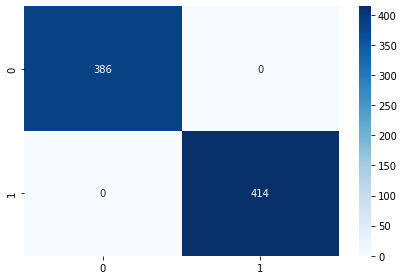

In [69]:
plot_confusionmatrix(y_pred_train,y_train,"Train")

Test Confusion matrix


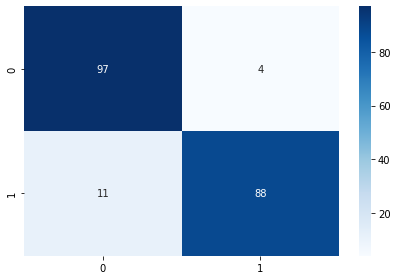

In [71]:
plot_confusionmatrix(y_pred_test,y_test,"Test")

### Part B

In [86]:
# HERE YOU WILL USE THIS TEMPLATE TO SAVE THE PREDICTIONS ON THE TEST SET

# Load the test data
test_df = pd.read_csv('CE802_P2_Test.csv')

# Make sure you work on a copy
test_data = test_df.iloc[:,:-1].copy()

filtered_data = test_data.drop('F21', axis=1)

predicted = pipe.predict(filtered_data)
... # CHANGE HERE -- use your previously trained predictor and apply it to test_data
                # (test_data can be modified if needed but make sure you don't change the order of the rows)...

# Replace the last (empty) column with your prediction
test_df.iloc[:,-1] = predicted
test_df.Class = test_df.Class.astype(bool)

# Save to the destination file
test_df.to_csv('CE802_P2_Test_Predictions.csv', index=False, float_format='%.8g')

# IMPORTANT!! Make sure only the last column has changed
assert pd.read_csv('CE802_P2_Test.csv').iloc[:,:-1].equals(pd.read_csv('CE802_P2_Test_Predictions.csv').iloc[:,:-1])